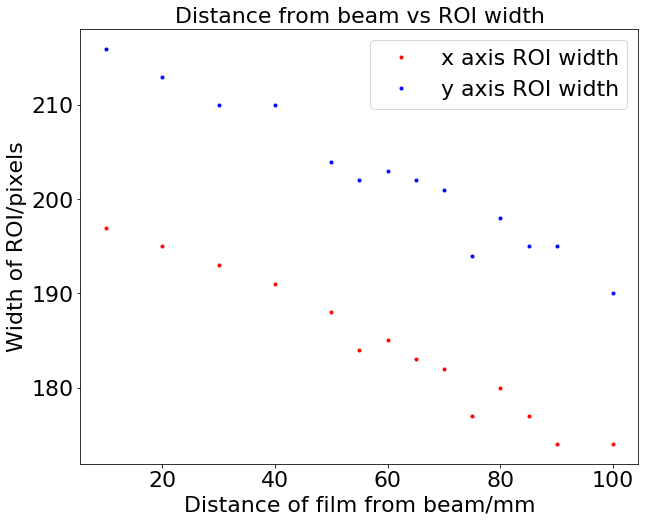

In [48]:
import os
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

folder = 'Distance_Simulation/'

params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)

    
def image_ret(file_num, col=0):
    image = tiff.imread(folder+str(file_num)+'mm.tiff')[:,:,col]
    return image

def get_file_nums(folder):
    files = os.listdir(folder)
    nums = ([])
    for i in range(len(files)):
        try: nums.append(int(files[i].strip('mm.tiff')))
        except: continue
    return sorted(nums)
    #finds out files in the folder

def roi_width(image):
    x = image.mean(axis=0)
    y = image.mean(axis=1)
    max_x = np.argmax(np.gradient(x))
    min_x = np.argmin(np.gradient(x))
    max_y = np.argmax(np.gradient(y))
    min_y = np.argmin(np.gradient(y))
    x_width = abs(max_x-min_x)
    y_width = abs(max_y-min_y)
    return x_width, y_width



def penumbra_vals(file_nums): #takes the image locations and returns roi widths
    penumbra_xvals,penumbra_yvals = ([]),([])
    for i in file_nums:
        penumbra_xvals.append(roi_width(image_ret(i))[0])
        penumbra_yvals.append(roi_width(image_ret(i))[1])
    return penumbra_xvals, penumbra_yvals


def penumbra_show(folder):
    distances = get_file_nums(folder)
    combined_xwidths, combined_ywidths = penumbra_vals(distances)
    plt.plot(distances,combined_xwidths,'r.',label='x axis ROI width')
    plt.plot(distances,combined_ywidths,'b.',label='y axis ROI width')
    plt.title('Distance from beam vs ROI width')
    plt.xlabel('Distance of film from beam/mm')
    plt.ylabel('Width of ROI/pixels')
    plt.legend()
    plt.show()

    

penumbra_show(folder)